In [6]:
"""
IPython Notebook v4.0 para python 2.7
Librerías adicionales: numpy, matplotlib
Contenido bajo licencia CC-BY 4.0. Código bajo licencia MIT. (c) Sebastian Flores.
"""

# Configuracion para recargar módulos y librerías 
%reload_ext autoreload
%autoreload 2
%matplotlib inline

from IPython.core.display import HTML

HTML(open("style/mat281.css", "r").read())

<header class="w3-container w3-teal">
<img src="images/utfsm.png" alt="" height="100px" align="left"/>
<img src="images/mat.png" alt="" height="100px" align="right"/>
</header>
<br/><br/><br/><br/><br/>
# MAT281
## Aplicaciones de la Matemática en la Ingeniería

### Sebastián Flores

https://www.github.com/sebastiandres/mat281


## Clase anterior

* Holdout Set

## ¿Qué contenido aprenderemos?

* Cross Validation


## ¿Porqué aprenderemos ese contenido?

* Cross Validation

Esencial para poder estimar el poder predictivo de un modelo cuando se tienen pocos datos o el modelo es costoso de entrenar o evaluar.


## Modelo

Ilustraremos el funcionamiento del método con datos sintéticos:
$$ y(x) = 5 \cos \Big( \frac{\pi}{4} x \Big) + \mathcal{N}\Big(0,1\Big)$$

Buscaremos ajustar un modelo del tipo
$$ y(x) = a \cos \Big( b x + c\Big) + d$$
minimizando el error cuadrático.

El error predictivo del modelo será calculado utilizando RMSE:
$$ E(o,p) = \sqrt{ \frac{1}{N}\sum_{i=1}^N (o_i - p_i)^2 }$$
El RMSE corresponde a la desviación estándar de los residuos.

## 2. Cross Validation

Se realiza de manera secuencial varios procedimientos de Holdout Set. 
Los datos se utilizan para entrenar el modelo o para testear el modelo, pero nunca para ambas simultáneamente.

<img src="images/CrossValidation.png" alt="" width="400px" align="middle"/>

#### 2. Cross Validation
## Características

* Es similar al holdout set.

* Datos son utilizados tanto para entrenar el modelo, como para el error de predicción pero nunca simultáneamente.

* Permite obtener estimación de la variablidad del verdadero error de estimación.

#### 2. Cross Validation
## ¿Cuántes y cuales particiones utilizar?

* Pocas particiones: error de predicción será conservador y con poca variabilidad.
* Muchas particiones: error de predicción será realista pero con mucha variabilidad.
* Resulta necesario considerar además el tiempo computacional requerido para entrenar los modelos en cada partición.

#### 2. Cross Validation
## Alternativas

¿Cómo hacermos las particiones?

* Validación Cruzada no Exhaustiva Secuencial.
* Validación Cruzada no Exhaustiva Aleatoria.
* Validación Cruzada: Leave One Out (LOO).
* Validación Cruzada Exhaustiva.

## 2.1 Validación Cruzada No Exhaustiva Secuencial. 

* Se seleccionan $M$ particiones excluyentes: una fracción $(M-1)/M$ para entrenamiento y una fracción $1/M$ para testing.
* Un dato es utilizado una única vez como predicción y $M-1$ veces para entrenamiento.
* Requiere realizar mezclar aleatoriamente los datos al inicio.
* Típicamente 5 particiones de 80%-20% o 10 particiones de 90%-10%.

#### 2.1 Validación Cruzada No Exhaustiva Secuencial. 
## Implementación

Prediction error estimated on  1.14292502556 

Prediction error estimated on  1.22844690656 

Prediction error estimated on  0.542895484901 

Prediction error estimated on  1.33175592157 

Prediction error estimated on  0.752936896626 

Average of prediction error 0.999792047045
Standard Deviation of prediction error 0.300886038925


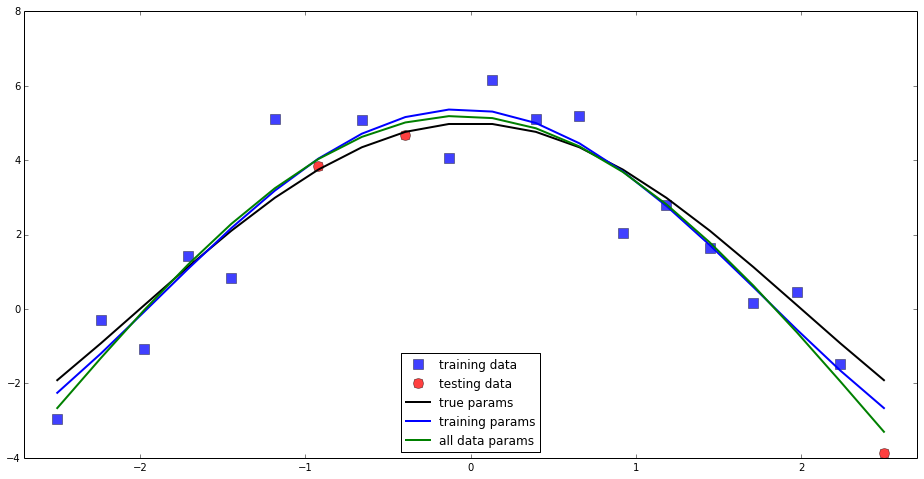

In [11]:
import numpy as np
from mat281_code import model

# Parameters
M = 5 # particiones

# Load data
data = model.load_data("data/dataN20.txt") # Change here
N = data.shape[0]
testing_size = int(1./M * N)

# Permute the data
np.random.seed(23)   # Change here
data = np.random.permutation(data)

# Create vector to store the prediction error
prediction_error = np.zeros(M)

# Perform Cross Validation
for i in range(M):
    index = np.arange(N)
    testing_index = np.logical_and(i*testing_size < index,
                                    index < (i+1)*testing_size)

    # Do the split
    testing_data = data[testing_index,:]
    training_data = data[np.logical_not(testing_index),:]

    # Train model excluding the holdout set
    training_params = model.get_params(training_data)

    # Test with the holdout set
    prediction_error[i] = model.get_error(training_params, testing_data)
    print "Prediction error estimated on ", prediction_error[i], "\n"

# Train model with all the data
all_data_params = model.get_params(data)

# Report
print "Average of prediction error", prediction_error.mean()
print "Standard Deviation of prediction error", prediction_error.std()

# Plot the model
model.plot(training_data, testing_data, training_params, all_data_params)

#### 2.1 Validación Cruzada No Exhaustiva

## Pro
* Simple de realizar y computacionalmente no TAN intensivo.
* Entrega buenos resultados.

## Contra
* Error de predicción conservador y con estimación de variabilidad. 
* Valor depende de la mezcla aleatoria inicial.

## 2.2 Validación Cruzada No Exhaustiva Aleatoria

* Se generan $M$ holdouts set de manera aleatoria.
* Un dato no necesariamente es utilizado una única vez como predicción.
* Requiere realizar mezclar aleatoriamente los datos en cada selección.
* Típicamente número de muestras depende del costo computacional.

#### 2.2 Validación Cruzada No Exhaustiva Aleatoria
## Implementación

Prediction error estimated on  0.651073769973 

Prediction error estimated on  1.23521811962 

Prediction error estimated on  1.10774879913 

Prediction error estimated on  0.399491028762 

Prediction error estimated on  0.84022252008 

Prediction error estimated on  1.51454146851 

Prediction error estimated on  0.841043775012 

Prediction error estimated on  1.3846473913 

Prediction error estimated on  0.840277241899 

Prediction error estimated on  1.3775562241 

Prediction error estimated on  1.07671527892 

Prediction error estimated on  1.10083324275 

Prediction error estimated on  0.994708496466 

Prediction error estimated on  1.32135990995 

Prediction error estimated on  0.828330258505 

Prediction error estimated on  1.59301130983 

Prediction error estimated on  0.961744174866 

Prediction error estimated on  1.100346663 

Prediction error estimated on  1.1402467836 

Prediction error estimated on  1.49804878419 

Average of prediction error 1.09035826202
Standard Deviati

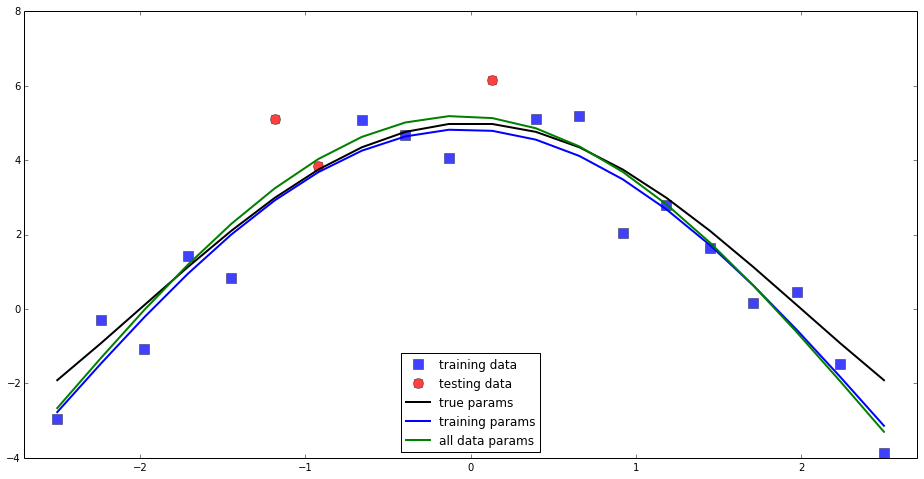

In [14]:
import numpy as np
from mat281_code import model

# Parameters
M = 20 # Muestras

# Load data
data = model.load_data("data/dataN20.txt")  # Change here
N = data.shape[0]
split = int(0.7*N)   # Change here

# Create vector to store the prediction error
prediction_error = np.zeros(M)

for i in range(M):
    # Permute the data
    np.random.seed(i)   # HERE IS THE MAIN POINT #
    data = np.random.permutation(data)

    # Do the split
    training_data = data[:split,:]
    testing_data = data[split:,:]

    # Train model excluding the holdout set
    training_params = model.get_params(training_data)

    # Test with the holdout set
    prediction_error[i] = model.get_error(training_params, testing_data)
    print "Prediction error estimated on ", prediction_error[i], "\n"

# Train model with all the data
all_data_params = model.get_params(data)

# Report
print "Average of prediction error", prediction_error.mean()
print "Standard Deviation of prediction error", prediction_error.std()

# Plot the model
model.plot(training_data, testing_data, training_params, all_data_params)

#### 2.2 Validación Cruzada No Exhaustiva Aleatoria

## Pro
* Simple de realizar pero computacionalmente intensivo.
* Entrega buenos resultados.

## Contra
* Error de predicción depende del número de muestras.
* Valor depende de aleatoriedad.

## 2.3 Leave One Out (LOO)

Si el número de datos $N$ es pequeño, se hacen $N$ particiones: Se entrena con $N-1$ datos y se prueba con $1$ datos.

* Fácil de implementar
* **NO** Requiere realizar mezclar aleatoriamente los datos al inicio.

#### 2.3 Leave One Out (LOO)
## Implementación

Prediction error estimated on  2.03881479455
Prediction error estimated on  0.0840700746024
Prediction error estimated on  0.260826904208
Prediction error estimated on  0.332770621087
Prediction error estimated on  0.338354549509
Prediction error estimated on  0.26070850694
Prediction error estimated on  1.9192085828
Prediction error estimated on  0.295621784059
Prediction error estimated on  0.521718768715
Prediction error estimated on  1.55729374672
Prediction error estimated on  1.29217034505
Prediction error estimated on  0.427238116989
Prediction error estimated on  2.28028993794
Prediction error estimated on  1.40390863121
Prediction error estimated on  0.355372513494
Prediction error estimated on  1.07782947331
Prediction error estimated on  1.51614789814
Prediction error estimated on  0.162980819819
Prediction error estimated on  0.191837796244
Prediction error estimated on  0.321009217658
Prediction error estimated on  1.89512400597
Prediction error estimated on  0.39882364822

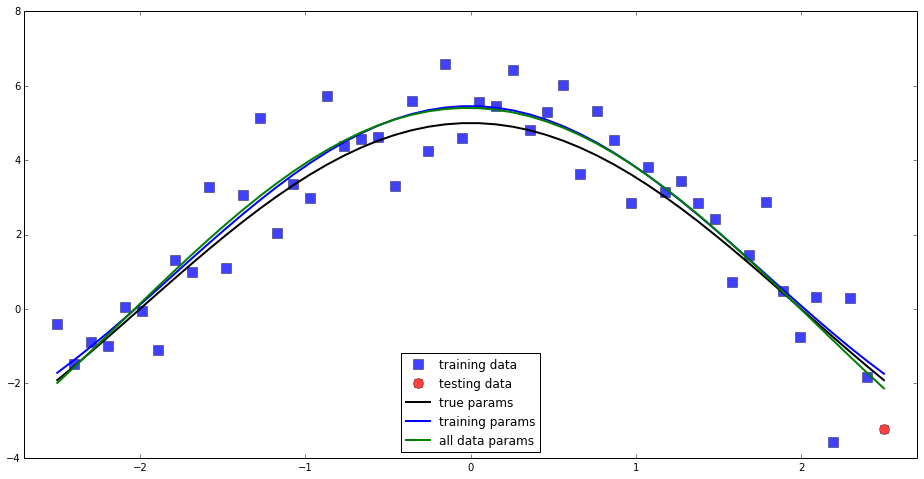

In [19]:
import numpy as np
from mat281_code import model

# Parameter free (M=N)

# Load data
data = model.load_data("data/dataN50.txt")  # Change here
N = data.shape[0]

# Create vector to store the prediction error
prediction_error = np.zeros(N)

for i in range(N):
    
    testing_index = np.zeros(N, dtype=bool)
    testing_index[i] = True

    # Do the split
    testing_data = data[testing_index,:]
    training_data = data[np.logical_not(testing_index),:]

    # Train model excluding the holdout set
    training_params = model.get_params(training_data)

    # Test with the holdout set
    prediction_error[i] = model.get_error(training_params, testing_data)
    print "Prediction error estimated on ", prediction_error[i]

# Train model with all the data
all_data_params = model.get_params(data)

# Report
print "Average of prediction error", prediction_error.mean()
print "Standard Deviation of prediction error", prediction_error.std()

# Plot the model
model.plot(training_data, testing_data, training_params, all_data_params)

#### 2.3 Validación Cruzada: Leave One Out

## Pro
* No es necesario configurar: tamaño y numero de particiones fijo.
* Completamente exhaustivo: no contiene aleatoriedad.

## Contra
* Computacionalmente intensivo: sólo para modelos "baratos" de conseguir y tamaños de datos pequeños.
* Estimación de error optimista con posibilidad de sobreajuste.


## 2.4  Validación Cruzada Exhaustiva

* Se elige un número bajo.
* 
from scipy.misc import comb


In [8]:
from scipy.misc import comb
N = 20
split = int(0.7*N)
print comb(N,split)

38760.0



#### 2.4 Validación Cruzada Exhaustiva
## Implementación

In [9]:
import numpy as np
from mat281_code import model

import itertools # Library to get the permutations
from scipy.misc import comb


# Load data
data = model.load_data("data/dataN10.txt")  # Change here
N = data.shape[0]
split = int(0.7*N)
M = int(comb(N,split))

# Create vector to store the prediction error
prediction_error = np.zeros(M)
index = np.arange(N)

for i, training_index in enumerate(itertools.combinations(index,split)):
                                
    # Do the split
    training_data = data[np.array(training_index),:]
    testing_index = list(set(range(N))-set(training_index))
    testing_data = data[np.array(testing_index),:]

    # Train model excluding the holdout set
    training_params = model.get_params(training_data)

    # Test with the holdout set
    prediction_error[i] = model.get_error(training_params, testing_data)

# Train model with all the data
all_data_params = model.get_params(data)

# Report
print "Average of prediction error", prediction_error.mean()
print "Standard Deviation of prediction error", prediction_error.std()

# Plot the model
model.plot(training_data, testing_data, training_params, all_data_params)

Average of prediction error 0.943812436889
Standard Deviation of prediction error 0.760646992099


#### 2.4 Validación Cruzada Exhaustiva

## Pro
* No es necesario configurar: tamaño y número de particiones fijo.
* Completamente exhaustivo: no contiene aleatoriedad.

## Contra
* Computacionalmente muy intensivo: sólo para modelos "baratos" de conseguir y tamaños de datos muy pequeños. Utilizar sólo si datos son extremadamente escasos.
* Estimación de error optimista con posibilidad de sobreajuste, debido a pocos datos. 
* Modelo es malo, pero sabemos que tan malo es.